In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Helper Function

In [3]:
def get_total_labels(x: list) -> dict:
  labels = {}
  for i in x:
    if i not in labels:
      labels[i] = 0
    labels[i] += 1
  return labels

def conv_dict_to_percent(dictionary) -> dict:
  # Input: Dictionary with String->number
  # Output: Dictionary with String ->percentages
  total = sum([dictionary[i] for i in dictionary])
  final_dict = {}
  for i in dictionary:
    final_dict[i] = dictionary[i] / total
  return final_dict

# Global Variables

In [4]:
paid = {
    "indobert": {
        0 : 0,
        1 : 0
    },
    "indobertweet": {
        0 : 0,
        1 : 0
    },
    "cnnlstm": {
        0 : 0,
        1 : 0
    },
}

nonpaid = {
    "indobert": {
        0 : 0,
        1 : 0
    },
    "indobertweet": {
        0 : 0,
        1 : 0
    },
    "cnnlstm": {
        0 : 0,
        1 : 0
    },
}

# Model Performance Visualization

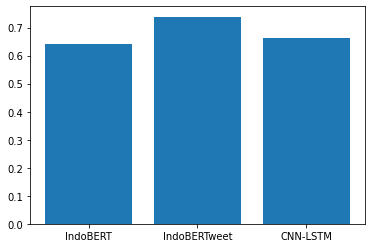

In [ ]:
test_accuracy = {
    "IndoBERT" : 0.641791,
    "IndoBERTweet": 0.738806,
    "CNN-LSTM" : 0.6642,
}

x = [x for x in test_accuracy]
y1 = [test_accuracy[x] for x in test_accuracy]
plt.bar(x, y1)
plt.show()

# IndoBERT Visualization

In [ ]:
base_predicted_folder = "/content/drive/Shareddrives/Riset Sentimen Vaksin COVID: Yaudahlah/Riset/Data/5. Predict Data/predicted/IndoBERT"

## Gratis dan Berbayar

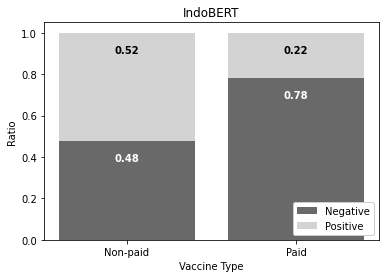

In [ ]:
# Gratis
file_path = base_predicted_folder + "/gratis.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
count_gratis = get_total_labels(prediction)
percentages_gratis = conv_dict_to_percent(count_gratis)

# Bayar
file_path = base_predicted_folder + "/bayar.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
count_bayar = get_total_labels(prediction)
percentages_bayar = conv_dict_to_percent(count_bayar)

# Ploting
x = ["Non-paid", "Paid"]
y1 = [percentages_gratis[0], percentages_bayar[0]]
y2 = [percentages_gratis[1], percentages_bayar[1]]
fig, ax = plt.subplots()
ax.bar(x, y1, color="dimgray", label="Negative")
ax.bar(x, y2, color="lightgray", bottom=y1, label="Positive")

y_offset = -0.1
i = 0
for bar in ax.patches:
  color = "black"
  if i < len(ax.patches) // 2:
    color = "white"
  i += 1
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      "{:.2f}".format(round(bar.get_height(), 2)),
      # Center the labels and style them a bit.
      ha='center',
      color=color,
      weight='bold',
      size=10
  )

ax.set_title("IndoBERT")
ax.legend(loc="lower right", framealpha=1)
ax.set_xlabel("Vaccine Type")
ax.set_ylabel("Ratio")

# set global var
nonpaid["indobert"] = {
    0 : percentages_gratis[0],
    1 : percentages_gratis[1]
}

paid["indobert"] = {
    0 : percentages_bayar[0],
    1 : percentages_bayar[1]
}

## Jenis Vaksin

Text(0, 0.5, 'Ratio')

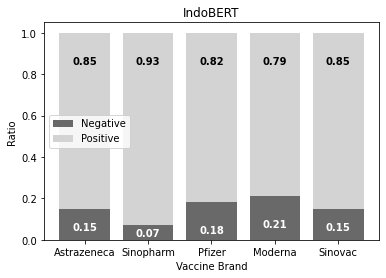

In [ ]:
# Astrazeneca
file_path = base_predicted_folder + "/astrazeneca.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
count_astra = get_total_labels(prediction)
percentages_astra = conv_dict_to_percent(count_astra)

# Sinopharm
file_path = base_predicted_folder + "/sinopharm.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
count_sino = get_total_labels(prediction)
percentages_sino = conv_dict_to_percent(count_sino)

# Pfizer
file_path = base_predicted_folder + "/pfizer.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
count_pfizer = get_total_labels(prediction)
percentages_pfizer = conv_dict_to_percent(count_pfizer)

# Moderna
file_path = base_predicted_folder + "/moderna.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
count_moderna = get_total_labels(prediction)
percentages_moderna = conv_dict_to_percent(count_moderna)

# Sinovac
file_path = base_predicted_folder + "/sinovac.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
count_vac = get_total_labels(prediction)
percentages_vac = conv_dict_to_percent(count_vac)

# Ploting
fig, ax = plt.subplots()
x = ["Astrazeneca", "Sinopharm", "Pfizer", "Moderna", "Sinovac"]
y1 = [percentages_astra[0], percentages_sino[0], percentages_pfizer[0], percentages_moderna[0], percentages_vac[0]]
y2 = [percentages_astra[1], percentages_sino[1], percentages_pfizer[1], percentages_moderna[1], percentages_vac[1]]
ax.bar(x, y1, color="dimgray", label="Negative")
ax.bar(x, y2, color="lightgray", bottom=y1, label="Positive")

y_offset = -0.15
i = 0
for bar in ax.patches:
  
  if i==1:
    y_offset = -0.05
  elif i==4:
    y_offset = -0.1
  elif i == 0:
    y_offset = -0.1
  else:
    y_offset = -0.15

  color = "black"
  if i < len(ax.patches) // 2:
    color = "white"
  
  ax.text(
        # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      "{:.2f}".format(round(bar.get_height(), 2)),
      # Center the labels and style them a bit.
      ha='center',
      color=color,
      weight='bold',
      size=10
  )
  i+=1
ax.set_title("IndoBERT")
ax.legend(loc="center left")
ax.set_xlabel("Vaccine Brand")
ax.set_ylabel("Ratio")

# IndoBERTweet Visualization

In [ ]:
base_predicted_folder = "/content/drive/Shareddrives/Riset Sentimen Vaksin COVID: Yaudahlah/Riset/Data/5. Predict Data/predicted/IndoBERTweet/"

## Gratis dan Berbayar

gratis: 2975
bayar: 1127


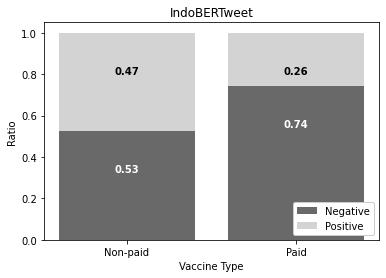

In [ ]:
# Gratis
file_path = base_predicted_folder + "/gratis.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
print(f"gratis: {len(prediction)}")
count_gratis = get_total_labels(prediction)
percentages_gratis = conv_dict_to_percent(count_gratis)

# Bayar
file_path = base_predicted_folder + "/bayar.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
print(f"bayar: {len(prediction)}")
count_bayar = get_total_labels(prediction)
percentages_bayar = conv_dict_to_percent(count_bayar)

# Ploting
x = ["Non-paid", "Paid"]
y1 = [percentages_gratis[0], percentages_bayar[0]]
y2 = [percentages_gratis[1], percentages_bayar[1]]
fig, ax = plt.subplots()
ax.bar(x, y1, color="dimgrey", label="Negative")
ax.bar(x, y2, color="lightgray", bottom=y1, label="Positive")

y_offset = -0.2
i = 0
for bar in ax.patches:
  color = "black"
  if i < len(ax.patches) // 2:
    color = "white"
  i += 1
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      "{:.2f}".format(round(bar.get_height(), 2)),
      # Center the labels and style them a bit.
      ha='center',
      color=color,
      weight='bold',
      size=10
  )

ax.set_title("IndoBERTweet")
ax.legend(loc="lower right", framealpha=1)
ax.set_xlabel("Vaccine Type")
ax.set_ylabel("Ratio")

# Set Global Variables
nonpaid["indobertweet"] = {
    0 : percentages_gratis[0],
    1 : percentages_gratis[1]
}

paid["indobertweet"] = {
    0 : percentages_bayar[0],
    1 : percentages_bayar[1]
}

## Jenis Vaksin

Text(0, 0.5, 'Ratio')

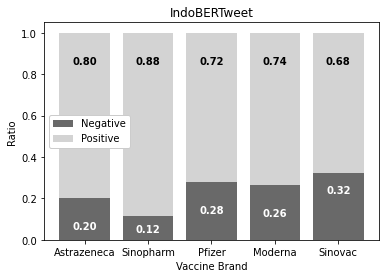

In [ ]:
# Astrazeneca
file_path = base_predicted_folder + "/astrazeneca.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
count_astra = get_total_labels(prediction)
percentages_astra = conv_dict_to_percent(count_astra)

# Sinopharm
file_path = base_predicted_folder + "/sinopharm.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
count_sino = get_total_labels(prediction)
percentages_sino = conv_dict_to_percent(count_sino)

# Pfizer
file_path = base_predicted_folder + "/pfizer.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
count_pfizer = get_total_labels(prediction)
percentages_pfizer = conv_dict_to_percent(count_pfizer)

# Moderna
file_path = base_predicted_folder + "/moderna.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
count_moderna = get_total_labels(prediction)
percentages_moderna = conv_dict_to_percent(count_moderna)

# Sinovac
file_path = base_predicted_folder + "/sinovac.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
count_vac = get_total_labels(prediction)
percentages_vac = conv_dict_to_percent(count_vac)

# Ploting
fig, ax = plt.subplots()
x = ["Astrazeneca", "Sinopharm", "Pfizer", "Moderna", "Sinovac"]
y1 = [percentages_astra[0], percentages_sino[0], percentages_pfizer[0], percentages_moderna[0], percentages_vac[0]]
y2 = [percentages_astra[1], percentages_sino[1], percentages_pfizer[1], percentages_moderna[1], percentages_vac[1]]
ax.bar(x, y1, color="dimgray", label="Negative")
ax.bar(x, y2, color="lightgray", bottom=y1, label="Positive")

y_offset = -0.15
i = 0
for bar in ax.patches:
  color = "black"
  if i < len(ax.patches) // 2:
    color = "white"
  if i==1:
    y_offset = -0.08
  elif i==4:
    y_offset = -0.1
  else:
    y_offset = -0.15
  
  ax.text(
        # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      "{:.2f}".format(round(bar.get_height(), 2)),
      # Center the labels and style them a bit.
      ha='center',
      color=color,
      weight='bold',
      size=10
  )
  i+=1

ax.set_title("IndoBERTweet")
ax.legend(loc="center left", framealpha=1)
ax.set_xlabel("Vaccine Brand")
ax.set_ylabel("Ratio")

In [ ]:
percentages_astra

{0: 0.2010906612133606, 1: 0.7989093387866394}

# CNN-LSTM Visualization

In [ ]:
base_predicted_folder = "/content/drive/Shareddrives/Riset Sentimen Vaksin COVID: Yaudahlah/Riset/Data/5. Predict Data/predicted/CNN-LSTM/"

## Gratis dan Berbayar

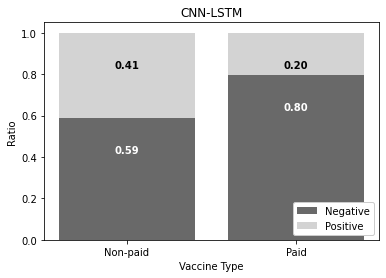

In [ ]:
# Gratis
file_path = base_predicted_folder + "/gratis.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
count_gratis = get_total_labels(prediction)
percentages_gratis = conv_dict_to_percent(count_gratis)

# Bayar
file_path = base_predicted_folder + "/bayar.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
count_bayar = get_total_labels(prediction)
percentages_bayar = conv_dict_to_percent(count_bayar)

# Ploting
x = ["Non-paid", "Paid"]
y1 = [percentages_gratis[0], percentages_bayar[0]]
y2 = [percentages_gratis[1], percentages_bayar[1]]
fig, ax = plt.subplots()
ax.bar(x, y1, color="dimgray", label="Negative")
ax.bar(x, y2, color="lightgray", bottom=y1, label="Positive")

y_offset = -0.17
i = 0
for bar in ax.patches:
  color = "black"
  if i < len(ax.patches) // 2:
    color = "white"
  i += 1
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      "{:.2f}".format(round(bar.get_height(), 2)),
      # Center the labels and style them a bit.
      ha='center',
      color=color,
      weight='bold',
      size=10
  )

ax.set_title("CNN-LSTM")
ax.legend(loc="lower right", framealpha=1)
ax.set_xlabel("Vaccine Type")
ax.set_ylabel("Ratio")

nonpaid["cnnlstm"] = {
    0 : percentages_gratis[0],
    1 : percentages_gratis[1]
}

paid["cnnlstm"] = {
    0 : percentages_bayar[0],
    1 : percentages_bayar[1]
}

## Jenis Vaksin

astra: 1467
sino: 633
pfizer: 2091
moderna: 1288
sinovac: 4704


Text(0, 0.5, 'Ratio')

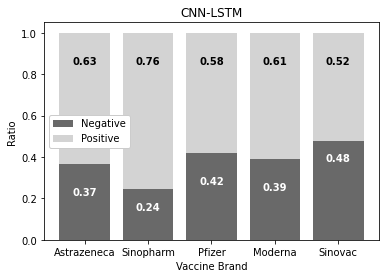

In [ ]:
# Astrazeneca
file_path = base_predicted_folder + "astra.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
print(f"astra: {len(prediction)}")
count_astra = get_total_labels(prediction)
percentages_astra = conv_dict_to_percent(count_astra)

# Sinopharm
file_path = base_predicted_folder + "sinopharm.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
print(f"sino: {len(prediction)}")
count_sino = get_total_labels(prediction)
percentages_sino = conv_dict_to_percent(count_sino)

# Pfizer
file_path = base_predicted_folder + "pfizer.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
print(f"pfizer: {len(prediction)}")
count_pfizer = get_total_labels(prediction)
percentages_pfizer = conv_dict_to_percent(count_pfizer)

# Moderna
file_path = base_predicted_folder + "moderna.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
print(f"moderna: {len(prediction)}")
count_moderna = get_total_labels(prediction)
percentages_moderna = conv_dict_to_percent(count_moderna)

# Sinovac
file_path = base_predicted_folder + "sinovac.csv"
df = pd.read_csv(file_path, index_col=0)
prediction = df["prediction"].to_list()
print(f"sinovac: {len(prediction)}")
count_vac = get_total_labels(prediction)
percentages_vac = conv_dict_to_percent(count_vac)

# Ploting
fig, ax = plt.subplots()
x = ["Astrazeneca", "Sinopharm", "Pfizer", "Moderna", "Sinovac"]
y1 = [percentages_astra[0], percentages_sino[0], percentages_pfizer[0], percentages_moderna[0], percentages_vac[0]]
y2 = [percentages_astra[1], percentages_sino[1], percentages_pfizer[1], percentages_moderna[1], percentages_vac[1]]
ax.bar(x, y1, color="dimgray", label="Negative")
ax.bar(x, y2, color="lightgray", bottom=y1, label="Positive")

y_offset = -0.15
i = 0
for bar in ax.patches:
  color = "black"
  if i < len(ax.patches) // 2:
    color = "white"
  
  if i==1:
    y_offset = -0.1
  elif i==4:
    y_offset = -0.1
  else:
    y_offset = -0.15
  
  ax.text(
        # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      "{:.2f}".format(round(bar.get_height(), 2)),
      # Center the labels and style them a bit.
      ha='center',
      color=color,
      weight='bold',
      size=10
  )
  i+=1

ax.set_title("CNN-LSTM")
ax.legend(loc="center left", framealpha=1)
ax.set_xlabel("Vaccine Brand")
ax.set_ylabel("Ratio")

# Keefektifan 3 Model

In [5]:
base_predicted_folder = "/content/drive/Shareddrives/Riset Sentimen Vaksin COVID: Yaudahlah/Riset/Data/5. Predict Data/predicted/"

In [6]:
indobert = pd.read_csv(base_predicted_folder + "IndoBERT/efektif.csv")
indobertTweet = pd.read_csv(base_predicted_folder + "IndoBERTweet/efektif.csv")
cnn_lstm = pd.read_csv(base_predicted_folder + "CNN-LSTM/efektif.csv")

# indobert
count_indobert = get_total_labels(indobert['prediction'].to_list())
percentages_indobert = conv_dict_to_percent(count_indobert)

# indobertweet
count_indobertTweet = get_total_labels(indobertTweet['prediction'].to_list())
percentages_indobertTweet = conv_dict_to_percent(count_indobertTweet)

# cnn-lstm
count_cnn_lstm = get_total_labels(cnn_lstm['prediction'].to_list())
percentages_cnn_lstm = conv_dict_to_percent(count_cnn_lstm)



Text(0, 0.5, 'Ratio')

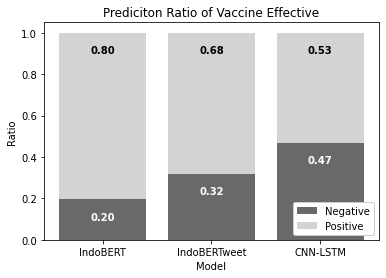

In [7]:
fig, ax = plt.subplots()

x = ["IndoBERT","IndoBERTweet","CNN-LSTM"]
y1 = [percentages_indobert[0],percentages_indobertTweet[0],percentages_cnn_lstm[0]]
y2 = [percentages_indobert[1],percentages_indobertTweet[1],percentages_cnn_lstm[1]]
ax.bar(x, y1, color="dimgray", label="Negative")
ax.bar(x, y2, color="lightgray", bottom=y1, label="Positive")

y_offset = -0.1
i = 0
for bar in ax.patches:
  color = "black"
  if i < len(ax.patches) // 2:
    color = "white"
  i += 1
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      "{:.2f}".format(round(bar.get_height(), 2)),
      # Center the labels and style them a bit.
      ha='center',
      color=color,
      weight='bold',
      size=10
  )

ax.set_title("Prediciton Ratio of Vaccine Effective")
ax.legend(loc="lower right", framealpha=1)
ax.set_xlabel("Model")
ax.set_ylabel("Ratio")

# One Figure

In [ ]:
paid

{'cnnlstm': {0: 0.7968056787932565, 1: 0.20319432120674358},
 'indobert': {0: 0.7834960070984915, 1: 0.21650399290150843},
 'indobertweet': {0: 0.743566992014197, 1: 0.25643300798580304}}

In [ ]:
nonpaid

{'cnnlstm': {0: 0.586218487394958, 1: 0.41378151260504203},
 'indobert': {0: 0.4786554621848739, 1: 0.521344537815126},
 'indobertweet': {0: 0.5277310924369748, 1: 0.4722689075630252}}

In [ ]:
# indobert_bayar = pd.read_csv(base_predicted_folder + "IndoBERT/bayar.csv")
# indobert_gratis = pd.read_csv(base_predicted_folder + "IndoBERT/gratis.csv")

# indobertTweet_bayar = pd.read_csv(base_predicted_folder + "IndoBERTweet/bayar.csv")
# indobertTweet_gratis = pd.read_csv(base_predicted_folder + "IndoBERTweet/gratis.csv")

# cnn_lstm_bayar = pd.read_csv(base_predicted_folder + "CNN-LSTM/bayar.csv")
# cnn_lstm_gratis = pd.read_csv(base_predicted_folder + "CNN-LSTM/gratis.csv")


# # indobert
# count_indobert_bayar = get_total_labels(indobert_bayar['prediction'].to_list())
# percentages_indobert_bayar = conv_dict_to_percent(count_indobert_bayar)

# count_indobert_gratis = get_total_labels(indobert_gratis['prediction'].to_list())
# percentages_indobert_gratis = conv_dict_to_percent(count_indobert_gratis)

# # indobertweet
# count_indobertTweet_bayar = get_total_labels(indobertTweet_bayar['prediction'].to_list())
# percentages_indobertTweet_bayar = conv_dict_to_percent(count_indobertTweet_bayar)

# count_indobertTweet_gratis = get_total_labels(indobertTweet_gratis['prediction'].to_list())
# percentages_indobertTweet_gratis= conv_dict_to_percent(count_indobertTweet_gratis)

# # cnn-lstm
# count_cnn_lstm_bayar = get_total_labels(cnn_lstm_bayar['prediction'].to_list())
# percentages_cnn_lstm_bayar = conv_dict_to_percent(count_cnn_lstm_bayar)

# count_cnn_lstm_gratis = get_total_labels(cnn_lstm_gratis['prediction'].to_list())
# percentages_cnn_lstm_gratis = conv_dict_to_percent(count_cnn_lstm_gratis)

In [ ]:
# fig, ax = plt.subplots()

# x = ["IndoBert","IndoBertWEET","CNN-LSTM"]
# y1 = [percentages_indobert[0],percentages_indobertTweet[0],percentages_cnn_lstm[0]]
# y2 = [percentages_indobert[1],percentages_indobertTweet[1],percentages_cnn_lstm[1]]
# ax.bar(x, y1, color="lightblue", label="Negative")
# ax.bar(x, y2, color="darkblue", bottom=y1, label="Positive")
# ax.set_title("Percentage of Vaccine Effective")
# ax.legend()